<a href="https://colab.research.google.com/github/shumshersubashgautam/QuantumMLEDXSolution-Colab/blob/master/8_0_samplingThermalState.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import itertools
import matplotlib.pyplot as plt
import numpy as np
import dimod
np.set_printoptions(precision=7, suppress=True)
from functools import reduce, partial
from scipy.optimize import minimize

from qiskit import BasicAer, QuantumRegister, QuantumCircuit, ClassicalRegister, execute
from qiskit.quantum_info import Pauli
from qiskit.aqua import get_aer_backend, QuantumInstance
from qiskit.aqua.operator import Operator
from qiskit.aqua.components.initial_states import Custom


In [0]:
!pip install qiskit

     |████████████████████████████████| 1.6MB 2.8MB/s 
     |████████████████████████████████| 17.3MB 40.2MB/s 
     |████████████████████████████████| 61kB 8.0MB/s 
     |████████████████████████████████| 102kB 12.2MB/s 
     |████████████████████████████████| 983kB 40.2MB/s 
     |████████████████████████████████| 51kB 6.2MB/s 
     |████████████████████████████████| 51kB 4.6MB/s 
     |████████████████████████████████| 5.3MB 29.8MB/s 
     |████████████████████████████████| 71kB 9.1MB/s 
     |████████████████████████████████| 21.7MB 425kB/s 
     |████████████████████████████████| 563kB 43.9MB/s 
     |████████████████████████████████| 2.3MB 28.8MB/s 
     |████████████████████████████████| 61kB 8.6MB/s 
     |████████████████████████████████| 61kB 8.4MB/s 
  Created wheel for qiskit: filename=qiskit-0.13.0-cp36-none-any.whl size=1399 sha256=ddd9b6ee2bf07ec98fabdf3bb25a0c902f06657fa782e09aa425f2ea7768c740
  Stored in directory: /root/.cache/pip/wheels/4e/f0/27/e914f739445603aa0229e

In [0]:
!git clone https://github.com/Ranlot/edX---Quantum-Machine-Learning.git

Cloning into 'edX---Quantum-Machine-Learning'...
remote: Enumerating objects: 112, done.
remote: Total 112 (delta 0), reused 0 (delta 0), pack-reused 112
Receiving objects: 100% (112/112), 75.45 MiB | 11.52 MiB/s, done.
Resolving deltas: 100% (31/31), done.


In [0]:
cd /content/edX---Quantum-Machine-Learning

/content/edX---Quantum-Machine-Learning


In [0]:
!pip install dimod 

     |████████████████████████████████| 839kB 2.6MB/s 


In [0]:
!pip install -r requirements.txt

     |████████████████████████████████| 102kB 2.4MB/s 
     |████████████████████████████████| 163kB 8.5MB/s 
     |████████████████████████████████| 430kB 37.4MB/s 
     |████████████████████████████████| 15.9MB 21.6MB/s 
     |████████████████████████████████| 2.4MB 24.9MB/s 
     |████████████████████████████████| 808kB 38.9MB/s 
     |████████████████████████████████| 81kB 8.4MB/s 
     |████████████████████████████████| 2.8MB 26.3MB/s 
     |████████████████████████████████| 122kB 25.5MB/s 
     |████████████████████████████████| 768kB 37.4MB/s 
     |████████████████████████████████| 112kB 39.0MB/s 
     |████████████████████████████████| 184kB 44.0MB/s 
     |████████████████████████████████| 133kB 44.5MB/s 
     |████████████████████████████████| 92kB 11.7MB/s 
     |████████████████████████████████| 133kB 43.2MB/s 
     |████████████████████████████████| 952kB 42.2MB/s 
     |████████████████████████████████| 51kB 6.4MB/s 
     |████████████████████████████████| 12.9MB 24.9MB/

In [0]:
!pip install qiskit-aqua

In [0]:
!pip install qiskit_aqua

In [0]:
n_spins = 10

h = {v: np.random.uniform(-2, 2) for v in range(n_spins)}
J = {}

allPermutations = list(itertools.combinations(h, 2))

print(h)

{0: -1.8456097481768117, 1: 1.0149058895570064, 2: -1.7055190822961044, 3: -1.9705337374744438, 4: 0.17073068351297627, 5: 1.115578648686514, 6: -0.5658716598629483, 7: 0.933888811776701, 8: 1.2306449834869286, 9: 0.31553918093456446}


In [0]:
for i, j in allPermutations:
    if np.random.random() < .01:
        J[(i, j)] = np.random.uniform(-1, 1)

model = dimod.BinaryQuadraticModel(h, J, 0.0, dimod.SPIN)
sampler = dimod.SimulatedAnnealingSampler()

print(model)

BinaryQuadraticModel({0: -1.8456097481768117, 1: 1.0149058895570064, 2: -1.7055190822961044, 3: -1.9705337374744438, 4: 0.17073068351297627, 5: 1.115578648686514, 6: -0.5658716598629483, 7: 0.933888811776701, 8: 1.2306449834869286, 9: 0.31553918093456446}, {(0, 7): -0.7506037142448618, (1, 7): 0.7989457168607246}, 0.0, Vartype.SPIN)


In [0]:
n_samples = 1000

def thermalSampler(T):
    beta = 1 / T
    response = sampler.sample(model, beta_range=[beta, beta], num_reads = n_samples)
    return [{'sample': sample.sample, 'energy': sample.energy} for sample in response.data()]

In [0]:
sampledData1 = thermalSampler(1)
sampledData10 = thermalSampler(10)
sampledData100 = thermalSampler(100)

In [0]:
def verifEnergy(sampledData):
    selectedSample = np.random.randint(0, n_samples)

    individualSpins = sum([x * y for x, y in zip(h.values(), sampledData[selectedSample]['sample'].values())])

    twoSpinCoupling = sum([J[(i, j)] * sampledData[selectedSample]['sample'][i] * sampledData[selectedSample]['sample'][j] 
                       for i, j in J])

    totalEnergy = individualSpins + twoSpinCoupling
    print('expected = %f\tverification = %f' % (sampledData[selectedSample]['energy'], totalEnergy))

In [0]:
verifEnergy(sampledData1)
verifEnergy(sampledData10)
verifEnergy(sampledData100)

expected = -9.919516	verification = -9.919516
expected = -5.224136	verification = -5.224136
expected = 0.284028	verification = 0.284028


In [0]:
def plot_probabilities(energy_samples, temperatures):
    fig, ax = plt.subplots()
    for i, (energies, T) in enumerate(zip(energy_samples, temperatures)):
        probabilities = np.exp(-np.array(sorted(energies))/T)
        Z = probabilities.sum()
        probabilities /= Z
        ax.plot(energies, probabilities, linewidth=3, label = "$T_" + str(i+1)+"$")
    minimum_energy = min([min(energies) for energies in energy_samples])
    maximum_energy = max([max(energies) for energies in energy_samples])
    ax.set_xlim(minimum_energy, maximum_energy)
    ax.set_xticks([]); ax.set_yticks([])
    ax.set_xlabel('Energy'); ax.set_ylabel('Probability'); ax.legend()
    plt.show()

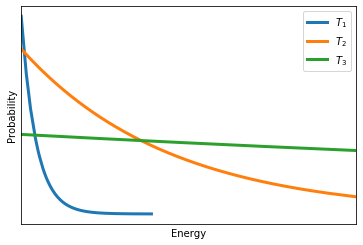

In [0]:

energies1   = [sampledData['energy'] for sampledData in sampledData1]
energies10  = [sampledData['energy'] for sampledData in sampledData10]
energies100 = [sampledData['energy'] for sampledData in sampledData100]

plot_probabilities([energies1, energies10, energies100], [1, 10, 100])

In [0]:

n_qubits = 2
n_system = n_qubits * 2
T = 1000


In [0]:
weights = np.array([[0,1],[0,0]])
p = 1

In [0]:
def pauli_z(qubit, coeff):
    eye = np.eye((n_system))
    return Operator([[coeff, Pauli(eye[qubit], np.zeros(n_system))]])

def pauli_x(qubit, coeff):
    eye = np.eye((n_qubits))
    return Operator([[coeff, Pauli(np.zeros(n_qubits), eye[qubit])]])

def product_pauli_z(q1, q2, coeff):
    eye = np.eye((n_system))
    return Operator([[coeff, Pauli(eye[q1], np.zeros(n_system)) * Pauli(eye[q2], np.zeros(n_system))]])

def ising_hamiltonian(weights):
    H = reduce(lambda x,y:x+y,
            [product_pauli_z(i,j, -weights[i,j])
             for (i,j) in itertools.product(range(n_qubits), range(n_qubits))])
    H.to_matrix()
    return H

In [0]:
Hc = ising_hamiltonian(weights)

/usr/local/lib/python3.6/dist-packages/qiskit/aqua/operator.py:62: DeprecationWarning: The `Operator` class is deprecated and will be removed after 0.6. Use the class for each representation instead, including `MatrixOperator`, `WeightedPauliOperator` and `TPBGroupedWeightedPauliOperator`
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/qiskit/aqua/operator.py:369: DeprecationWarning: The `Operator` class is deprecated and will be removed after 0.6. Use the class for each representation instead, including `MatrixOperator`, `WeightedPauliOperator` and `TPBGroupedWeightedPauliOperator`
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/qiskit/aqua/operator.py:267: DeprecationWarning: The `Operator` class is deprecated and will be removed after 0.6. Use the class for each representation instead, including `MatrixOperator`, `WeightedPauliOperator` and `TPBGroupedWeightedPauliOperator`
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/qiskit/aqua/operator.py

In [0]:
qr, cr = QuantumRegister(n_system), ClassicalRegister(n_qubits)
backend = BasicAer.get_backend('qasm_simulator')

In [0]:
def prepare_init_state(T):
    circuit_init = QuantumCircuit(qr, cr)
    α = 2 * np.arctan(np.exp(- 1/(2*T)))
    for i in range(n_qubits):
        circuit_init.rx(α, qr[n_qubits+i])
        circuit_init.cx(qr[n_qubits+i], qr[i])
    return circuit_init

In [0]:
def evolve(hamiltonian, angle, quantum_registers):
    return hamiltonian.evolve(None, angle, 'circuit', 1,
                              quantum_registers=quantum_registers,
                              expansion_mode='suzuki',
                              expansion_order=3)

def create_circuit(beta, gamma, circuit_init):
    Hm = reduce(lambda x, y: x+y,
            [pauli_x(i, 1) for i in range(n_qubits)])
    Hm.to_matrix()
    
    circuit_evolv = reduce(lambda x,y: x+y, [evolve(Hc, beta[i], qr) + evolve(Hm, gamma[i], qr)
                                             for i in range(p)])
    
    circuit = circuit_init + circuit_evolv
    return circuit

def evaluate_circuit(beta_gamma, circuit_init):
    circuit = create_circuit(beta_gamma[:p], beta_gamma[p:], circuit_init)
    return np.real(Hc.eval("matrix", circuit, get_aer_backend('statevector_simulator'))[0])
    
def run_qaoa(circuit_init):
    beta_init = np.random.uniform(0, np.pi*2, p)
    gamma_init = np.random.uniform(0, np.pi*2, p)
    evaluate = partial(evaluate_circuit, circuit_init=circuit_init)
    result = minimize(evaluate, np.concatenate([beta_init, gamma_init]), method='L-BFGS-B')
    
    circuit = create_circuit(result['x'][:p], result['x'][p:], circuit_init)

    return result["fun"], circuit

def get_thermal_state(T):
    circuit_init = prepare_init_state(T)
    return run_qaoa(circuit_init)

In [0]:
cost, thermal_state = get_thermal_state(T)
print("Result of QAOA", cost)

/usr/local/lib/python3.6/dist-packages/qiskit/aqua/operator.py:62: DeprecationWarning: The `Operator` class is deprecated and will be removed after 0.6. Use the class for each representation instead, including `MatrixOperator`, `WeightedPauliOperator` and `TPBGroupedWeightedPauliOperator`
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/qiskit/aqua/operator.py:369: DeprecationWarning: The `Operator` class is deprecated and will be removed after 0.6. Use the class for each representation instead, including `MatrixOperator`, `WeightedPauliOperator` and `TPBGroupedWeightedPauliOperator`
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/qiskit/aqua/operator.py:267: DeprecationWarning: The `Operator` class is deprecated and will be removed after 0.6. Use the class for each representation instead, including `MatrixOperator`, `WeightedPauliOperator` and `TPBGroupedWeightedPauliOperator`
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/qiskit/aqua/operator.py

AquaError: ignored

In [0]:
def get_energy(spin_configuration):
    x = spin_configuration.reshape(-1, 1)
    return np.sum([[-weights[i,j] * x[i] * x[j] for j in range(n_qubits)] for i in range(n_qubits)])

def get_energy_distribution(thermal_state):
    for i in range(n_qubits):
        thermal_state.measure(qr[i], cr[i])
    
    job = execute(thermal_state, backend, shots=5000)
    results = job.result().get_counts(thermal_state)
    
    list_spin_configs = np.array(np.concatenate([[list(spin_config)] * results[spin_config] for spin_config in results]), dtype="int")
    list_spin_configs[list_spin_configs == 0] = -1
    list_energy = np.array([get_energy(spin_config) for spin_config in list_spin_configs])
    return list_energy

In [0]:
list_energy = get_energy_distribution(thermal_state)
hist = plt.hist(list_energy, density=True)

NameError: ignored

In [0]:
import sklearn
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import Perceptron
from sklearn.svm import SVC
import sklearn.metrics
import sklearn.datasets
import numpy as np
import matplotlib.pyplot as plt

import dimod
from qiskit.quantum_info import Pauli
from qiskit.aqua import Operator
from qiskit.aqua import get_aer_backend, QuantumInstance
from qiskit.aqua.algorithms import QAOA
from qiskit.aqua.components.optimizers import COBYLA

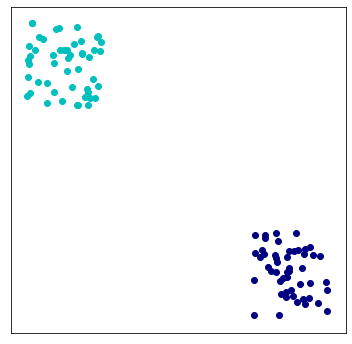

In [0]:
c1 = np.random.rand(50, 2) / 5
c2 = (-0.6, 0.5) + np.random.rand(50, 2) / 5

data = np.concatenate((c1, c2))
labels = np.array([0] * 50 + [1] *50)
plt.figure(figsize=(6, 6))
plt.subplot(111, xticks=[], yticks=[])
plt.scatter(data[:50, 0], data[:50, 1], color='navy')
plt.scatter(data[50:, 0], data[50:, 1], color='c');

In [0]:
idx = np.arange(len(labels))
np.random.shuffle(idx)

# train on a random 2/3 and test on the remaining 1/3

idx_train, idx_test = idx[:2 * len(idx) // 3], idx[2 * len(idx) // 3:]

X_train, X_test = data[idx_train], data[idx_test]
y_train, y_test = labels[idx_train], labels[idx_test]

In [0]:
metric = sklearn.metrics.accuracy_score

In [0]:
model_1 = Perceptron(max_iter=1000, tol=1e-3)
model_1.fit(X_train, y_train)
print('accuracy (train): %5.2f'%(metric(y_train, model_1.predict(X_train))))
print('accuracy (test): %5.2f'%(metric(y_test, model_1.predict(X_test))))

accuracy (train):  1.00
accuracy (test):  1.00


In [0]:
model_2 = SVC(kernel='linear', C=1)
model_2.fit(X_train, y_train)
print('accuracy (train): %5.2f'%(metric(y_train, model_2.predict(X_train))))
print('accuracy (test): %5.2f'%(metric(y_test, model_2.predict(X_test))))
print('Number of support vectors:', sum(model_2.n_support_))

accuracy (train):  1.00
accuracy (test):  1.00
Number of support vectors: 12


In [0]:
model_2 = SVC(kernel='linear', C=1)
model_2.fit(X_train, y_train)
print('accuracy (train): %5.2f'%(metric(y_train, model_2.predict(X_train))))
print('accuracy (test): %5.2f'%(metric(y_test, model_2.predict(X_test))))
print('Number of support vectors:', sum(model_2.n_support_))

accuracy (train):  1.00
accuracy (test):  1.00
Number of support vectors: 12


In [0]:
model_2 = SVC(kernel='linear', C=0.01)
model_2.fit(X_train, y_train)
print('accuracy (train): %5.2f'%(metric(y_train, model_2.predict(X_train))))
print('accuracy (test): %5.2f'%(metric(y_test, model_2.predict(X_test))))
print('Number of support vectors:', sum(model_2.n_support_))

accuracy (train):  0.56
accuracy (test):  0.38
Number of support vectors: 58


In [0]:
metric = sklearn.metrics.accuracy_score

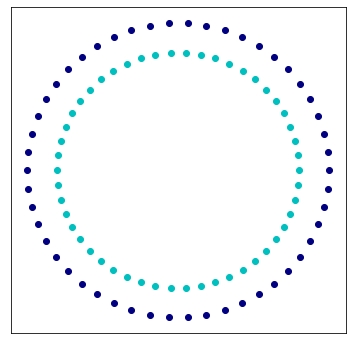

In [0]:
np.random.seed(0)

data, labels = sklearn.datasets.make_circles()
idx = np.arange(len(labels))
np.random.shuffle(idx)

# train on a random 2/3 and test on the remaining 1/3

idx_train, idx_test = idx[: 2 * len(idx) // 3], idx[2 * len(idx) // 3:]

X_train, X_test = data[idx_train], data[idx_test]

# binary -> spin
y_train, y_test = 2 * labels[idx_train] - 1, 2 * labels[idx_test] - 1

scaler, normalizer = sklearn.preprocessing.StandardScaler(), sklearn.preprocessing.Normalizer()

X_train = scaler.fit_transform(X_train)
X_train = normalizer.fit_transform(X_train)

X_test = scaler.fit_transform(X_test)
X_test = normalizer.fit_transform(X_test)

plt.figure(figsize=(6, 6))
plt.subplot(111, xticks=[], yticks=[])
plt.scatter(data[labels == 0, 0], data[labels == 0, 1], color='navy')
plt.scatter(data[labels == 1, 0], data[labels == 1, 1], color='c');

In [0]:
model_1 = Perceptron(max_iter=1000, tol=1e-3)
model_1.fit(X_train, y_train)
print('accuracy (train): %5.2f'%(metric(y_train, model_1.predict(X_train))))
print('accuracy (test): %5.2f'%(metric(y_test, model_1.predict(X_test))))

accuracy (train):  0.44
accuracy (test):  0.65


In [0]:
model_2 = SVC(kernel='rbf', gamma='auto')
model_2.fit(X_train, y_train)
print('accuracy (train): %5.2f'%(metric(y_train, model_2.predict(X_train))))
print('accuracy (test): %5.2f'%(metric(y_test, model_2.predict(X_test))))

accuracy (train):  0.64
accuracy (test):  0.24


In [0]:
model_3 = AdaBoostClassifier(n_estimators=3)
model_3.fit(X_train, y_train)
print('accuracy (train): %5.2f'%(metric(y_train, model_3.predict(X_train))))
print('accuracy (test): %5.2f'%(metric(y_test, model_3.predict(X_test))))

accuracy (train):  0.65
accuracy (test):  0.29


In [0]:
models = [model_1, model_2, model_3]

n_models = len(models)

In [0]:
predictions = np.array([h.predict(X_train) for h in models], dtype=np.float64)

predictions *= 1/n_models

In [0]:
modAcc = lambda pred: sum([np.sign(x) == np.sign(y) for x, y in zip(pred, y_train)]) / len(y_train)
mod1Acc = modAcc(predictions[0])
mod2Acc = modAcc(predictions[1])
mod3Acc = modAcc(predictions[2])
print('model_1 = %.2f\nmodel_2 = %.2f\nmodel_3 = %.2f' % (mod1Acc, mod2Acc, mod3Acc))

model_1 = 0.44
model_2 = 0.64
model_3 = 0.65


In [0]:
λ = 1

In [0]:
w = np.dot(predictions, predictions.T)

In [0]:
wii = len(X_train) / (n_models ** 2) + λ - 2 * np.dot(predictions, y_train)

In [0]:
w[np.diag_indices_from(w)] = wii

In [0]:
W = {(i, j): w[i, j] for i in range(n_models) for j in range(i, n_models)}
W

{(0, 0): 13.666666666666664,
 (0, 1): -5.777777777777772,
 (0, 2): -3.7777777777777786,
 (1, 1): -3.666666666666666,
 (1, 2): 4.444444444444444,
 (2, 2): -5.0}

In [0]:
sampler = dimod.SimulatedAnnealingSampler()
response = sampler.sample_qubo(W, num_reads=10)
weights = list(response.first.sample.values())

In [0]:
weights

[0, 0, 1]

In [0]:
h, J, offset = dimod.qubo_to_ising(W)

print('h = %s' % h)
print('J = %s' % J)
print('constant offset applied to energy = %.2f' % offset)

h = {0: 4.444444444444445, 1: -2.166666666666665, 2: -2.333333333333334}
J = {(0, 1): -1.444444444444443, (0, 2): -0.9444444444444446, (1, 2): 1.111111111111111}
constant offset applied to energy = 1.22


In [0]:
num_nodes = w.shape[0]

Xvector = np.zeros(num_nodes)

def logicVec(vecSize, *indices):
    initVec = np.zeros(vecSize)
    for index in indices:
        assert index < vecSize
        initVec[index] = 1
    return initVec

diagonal = [[h[i], Pauli(logicVec(num_nodes, i), Xvector)] for i in h]
offDiagonal = [[J[i, j], Pauli(logicVec(num_nodes, i, j), Xvector)] for i, j in J]

# note that the ORDER in the list is important

# ising_model = Operator(paulis = diagonal + offDiagonal)
ising_model = Operator([diagonal[0], offDiagonal[0], offDiagonal[1], diagonal[1], offDiagonal[2], diagonal[2]])

/usr/local/lib/python3.6/dist-packages/qiskit/aqua/operator.py:62: DeprecationWarning: The `Operator` class is deprecated and will be removed after 0.6. Use the class for each representation instead, including `MatrixOperator`, `WeightedPauliOperator` and `TPBGroupedWeightedPauliOperator`
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/qiskit/aqua/operator.py:369: DeprecationWarning: The `Operator` class is deprecated and will be removed after 0.6. Use the class for each representation instead, including `MatrixOperator`, `WeightedPauliOperator` and `TPBGroupedWeightedPauliOperator`
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/qiskit/aqua/operator.py:267: DeprecationWarning: The `Operator` class is deprecated and will be removed after 0.6. Use the class for each representation instead, including `MatrixOperator`, `WeightedPauliOperator` and `TPBGroupedWeightedPauliOperator`
  DeprecationWarning)


In [0]:
qaoa = QAOA(ising_model, optimizer = COBYLA(), p=1, operator_mode='matrix')
quantum_instance = QuantumInstance(get_aer_backend('statevector_simulator'), shots=100)
result = qaoa.run(quantum_instance)

/usr/local/lib/python3.6/dist-packages/qiskit/aqua/operator.py:200: DeprecationWarning: The `Operator` class is deprecated and will be removed after 0.6. Use the class for each representation instead, including `MatrixOperator`, `WeightedPauliOperator` and `TPBGroupedWeightedPauliOperator`
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/qiskit/aqua/operators/op_converter.py:92: DeprecationWarning: The `Operator` class is deprecated. Please use `WeightedPauliOperator` or `TPBGroupedWeightedPauliOperator` or `MatrixOperator` instead
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/qiskit/aqua/operator.py:200: DeprecationWarning: The `Operator` class is deprecated and will be removed after 0.6. Use the class for each representation instead, including `MatrixOperator`, `WeightedPauliOperator` and `TPBGroupedWeightedPauliOperator`
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/qiskit/aqua/operator.py:951: DeprecationWarning: The `Operator` class is dep

In [0]:
k = np.argmax(result['eigvecs'][0])
weights = np.zeros(num_nodes)
for i in range(num_nodes):
    weights[i] = k % 2
    k >>= 1

In [0]:
weights

array([0., 0., 0.])

In [0]:
def modelPrediction(modelID, dataSet):
    modelPrediction = weights[modelID] * models[modelID].predict(dataSet)
    avgPrediction = np.sum(modelPrediction) / len(dataSet)
    return {'modelPrediction': modelPrediction, 'avgPrediction': avgPrediction}

def ensembleRes(dataSet):
    ensemblePreds = [modelPrediction(modelID, dataSet) for modelID in range(n_models)]
    avgPred = sum([pred['avgPrediction'] for pred in ensemblePreds]) / n_models
    accumulatePred = sum([pred['modelPrediction'] for pred in ensemblePreds])
    return np.sign(accumulatePred - avgPred)

print(metric(ensembleRes(X_train), y_train))
print(metric(ensembleRes(X_test), y_test))

0.0
0.0


In [0]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import pairwise_distances

In [70]:
n_instances = 4

n_perClass = n_instances // 2

# define 2 classes with a constant shift

class_1 = np.random.rand(n_perClass, 3) / n_perClass
class_2 = (0.6, 0.1, 0.05) + np.random.rand(n_perClass, 3) / n_perClass

data = np.concatenate((class_1, class_2))

data

array([[0.1106313, 0.070632 , 0.04863  ],
       [0.4920211, 0.1301705, 0.2685113],
       [0.8239631, 0.1497845, 0.2261558],
       [0.8346246, 0.5205701, 0.5023239]])

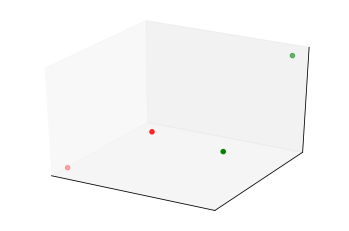

In [71]:
colors = ["red"] * n_perClass + ["green"] * n_perClass
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d', xticks=[], yticks=[], zticks=[])
ax.scatter(data[:, 0], data[:, 1], data[:, 2], c=colors)

In [72]:
w = pairwise_distances(data)
w

array([[0.       , 0.4442418, 0.7393394, 0.9656338],
       [0.4442418, 0.       , 0.3352076, 0.5696116],
       [0.7393394, 0.3352076, 0.       , 0.4624547],
       [0.9656338, 0.5696116, 0.4624547, 0.       ]])

In [76]:
from qiskit.aqua import get_aer_backend, QuantumInstance
from qiskit.aqua.algorithms import QAOA
from qiskit.aqua.components.optimizers import COBYLA
from qiskit.aqua.translators.ising import maxcut

ImportError: ignored

In [74]:
!pip install maxcut

ERROR: Could not find a version that satisfies the requirement maxcut (from versions: none)
ERROR: No matching distribution found for maxcut
